In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


# Load the dataset
df = pd.read_csv(r'C:\Users\allib\OneDrive\Desktop\MS Data Science\ANA500\vgsales.csv')


# Display basic info about the dataset
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Display initial dataset information
df_info, df_head, missing_values, summary_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


(None,
    Rank                      Name Platform    Year         Genre Publisher  \
 0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
 1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
 2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
 3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
 4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
 0     41.49     29.02      3.77         8.46         82.74  
 1     29.08      3.58      6.81         0.77         40.24  
 2     15.85     12.88      3.79         3.31         35.82  
 3     15.75     11.01      3.28         2.96         33.00  
 4     11.27      8.89     10.22         1.00         31.37  ,
 Rank              0
 Name              0
 Platform          0
 Year            271
 Genre             0
 Publisher        58
 NA_Sales         

In [35]:
#missing values

#Count missing values in each column
missing_values = df.isnull().sum()

#Combine both missing and zero value counts into a summary table
missing_zero_summary = pd.DataFrame({
    "Missing Values": missing_values})

print(missing_zero_summary)

              Missing Values
Rank                       0
Name                       0
Platform                   0
Year                     271
Genre                      0
Publisher                 58
NA_Sales                   0
EU_Sales                   0
JP_Sales                   0
Other_Sales                0
Global_Sales               0


In [21]:
#drop rows where 'Year' or 'Publisher' columns have missing values
df_cleaned = df.dropna(subset=['Year', 'Publisher'])

#count the number of records after cleaning
num_records_after_cleaning = df_cleaned.shape[0]

#display the updated record count
print(f"Number of records after dropping missing values: {num_records_after_cleaning}")


Number of records after dropping missing values: 16291


In [23]:
df_cleaned.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [39]:
#overview of my data

#Show target variable
target_variable = "Global_Sales"

#number of columns
num_columns = df.shape[1]

#Checking the data distribution
data_distribution = df_cleaned.describe()

#Minimum and Maximum values for Global Sales by region
min_max_sales_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['min', 'max'])

#Sales distribution by region
sales_distribution_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()

# Display results
print(f"Number of Columns: {num_columns}")
print(f"Target Variable: {target_variable}")
print("\nData Distribution:\n", data_distribution)
print("\nMin & Max Sales by Region:\n", min_max_sales_by_region)
print("\nSales Distribution by Region:\n", sales_distribution_by_region)


Number of Columns: 11
Target Variable: Global_Sales

Data Distribution:
                Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  

In [41]:
df_cleaned.duplicated().sum()

0

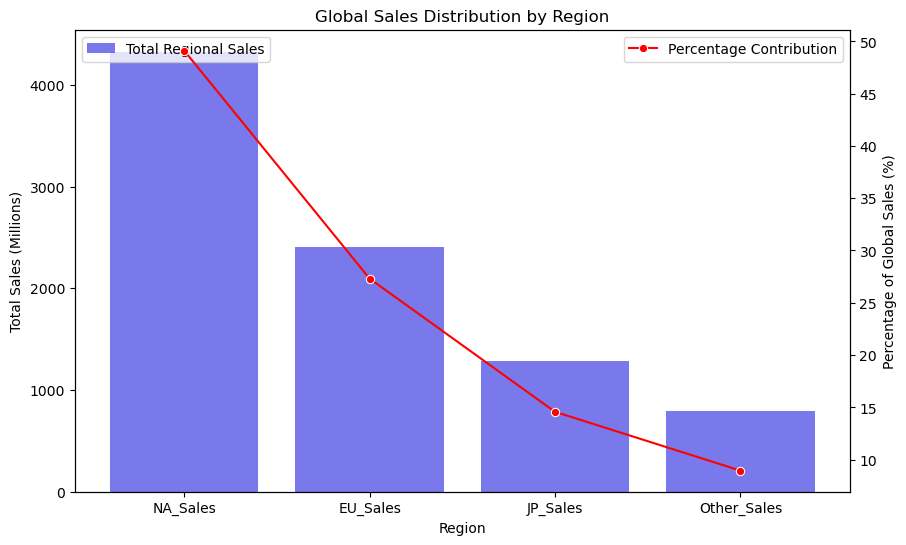

In [53]:
#Target variable distribution by region

#regional sales relative to Global Sales
region_sales = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
global_sales = df_cleaned['Global_Sales'].sum()

#calculate percentage contribution of each region
region_sales_percentage = (region_sales / global_sales) * 100

#create figure
plt.figure(figsize=(10, 6))

#bar for regional sales
ax = sns.barplot(x=region_sales.index, y=region_sales.values, color='blue', alpha=0.6, label="Total Regional Sales")

#overlay showing percentage contribution
ax2 = ax.twinx()
sns.lineplot(x=region_sales.index, y=region_sales_percentage.values, marker="o", color="red", label="Percentage Contribution", ax=ax2)

#labels
ax.set_ylabel("Total Sales (Millions)")
ax.set_xlabel("Region")
ax.set_title("Global Sales Distribution by Region")
ax.legend(loc="upper left")
ax2.set_ylabel("Percentage of Global Sales (%)")

plt.show()

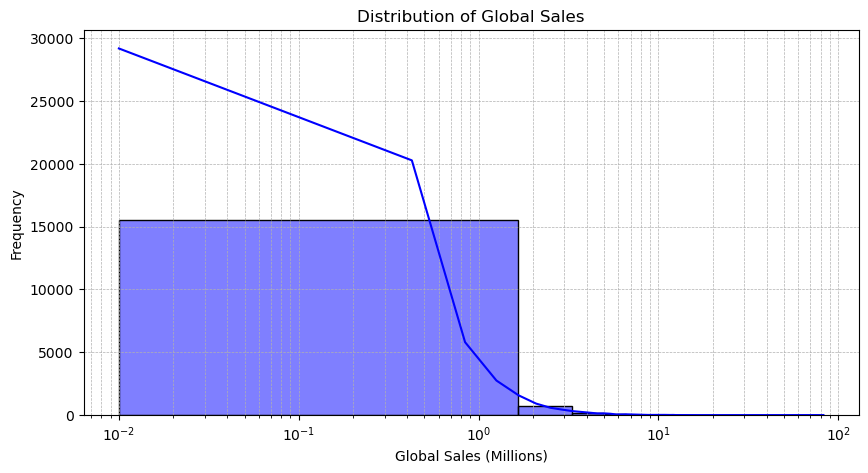

In [59]:
#distribution of Global Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Global_Sales'], bins=50, kde=True, color='blue')

#formatting the chart
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Frequency")
plt.xscale("log")  # Log scale helps visualize skewed distribution
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()